# Count of clinical categorical features in observed patients

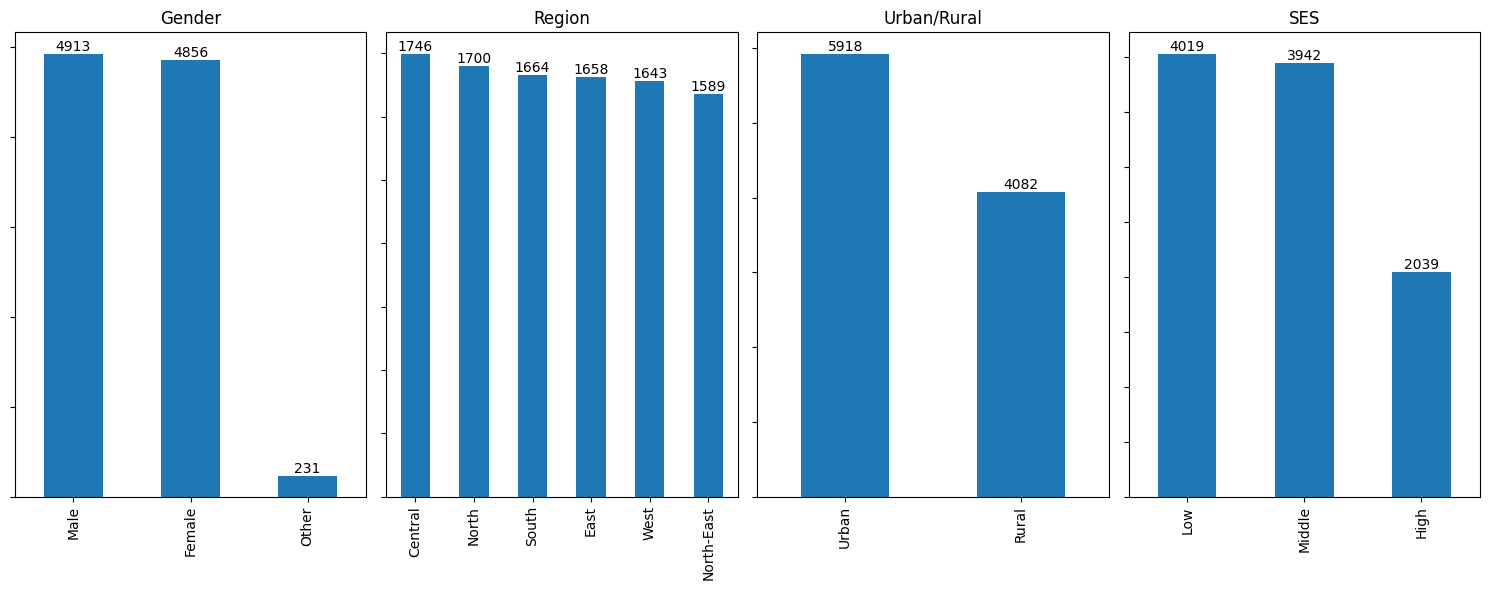

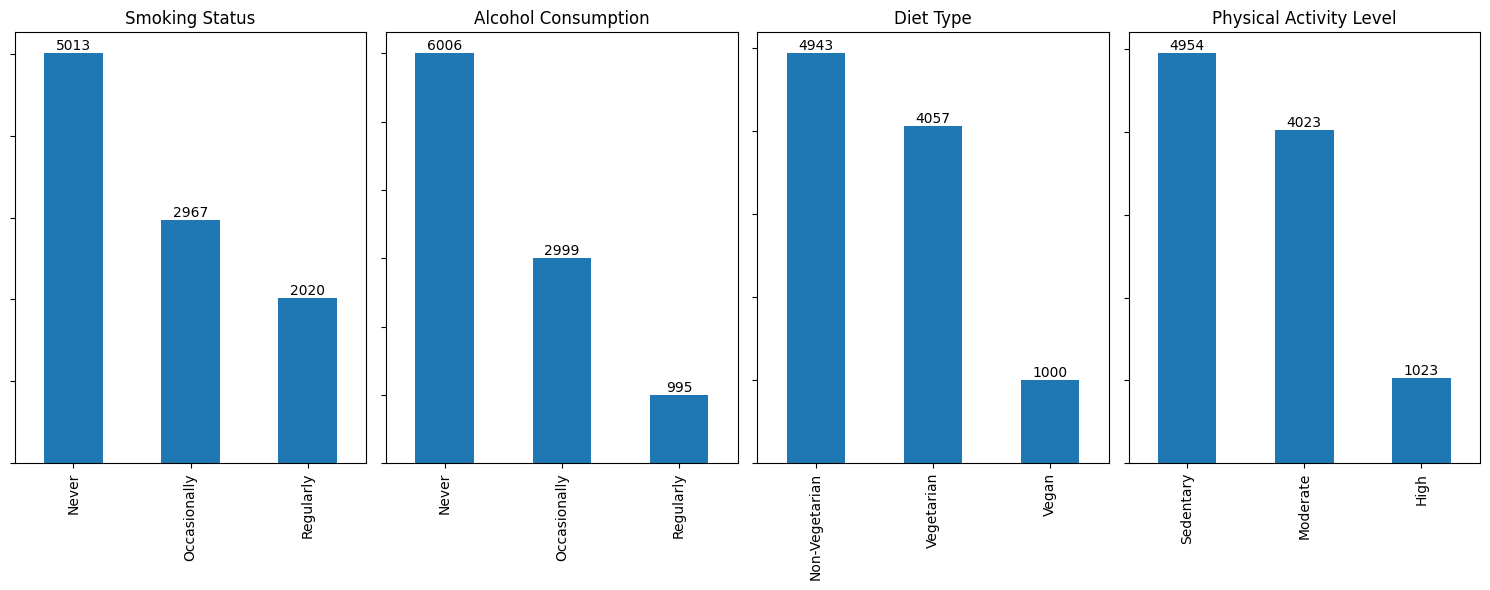

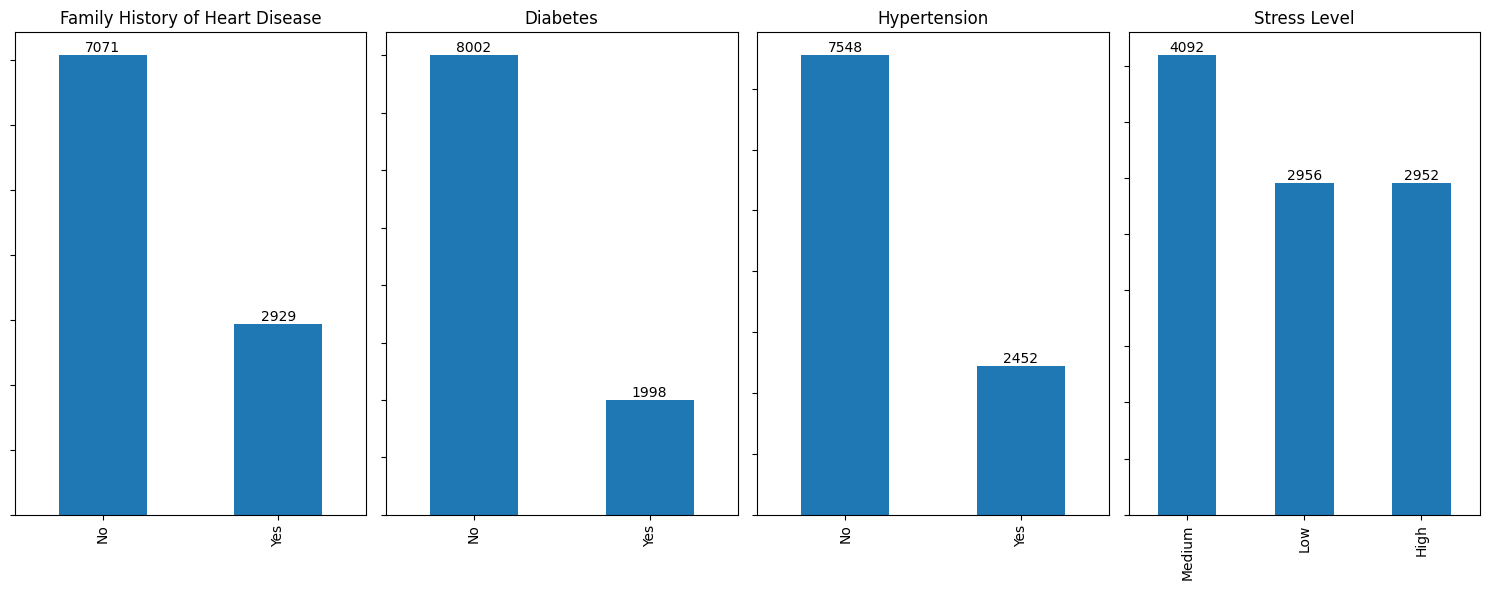

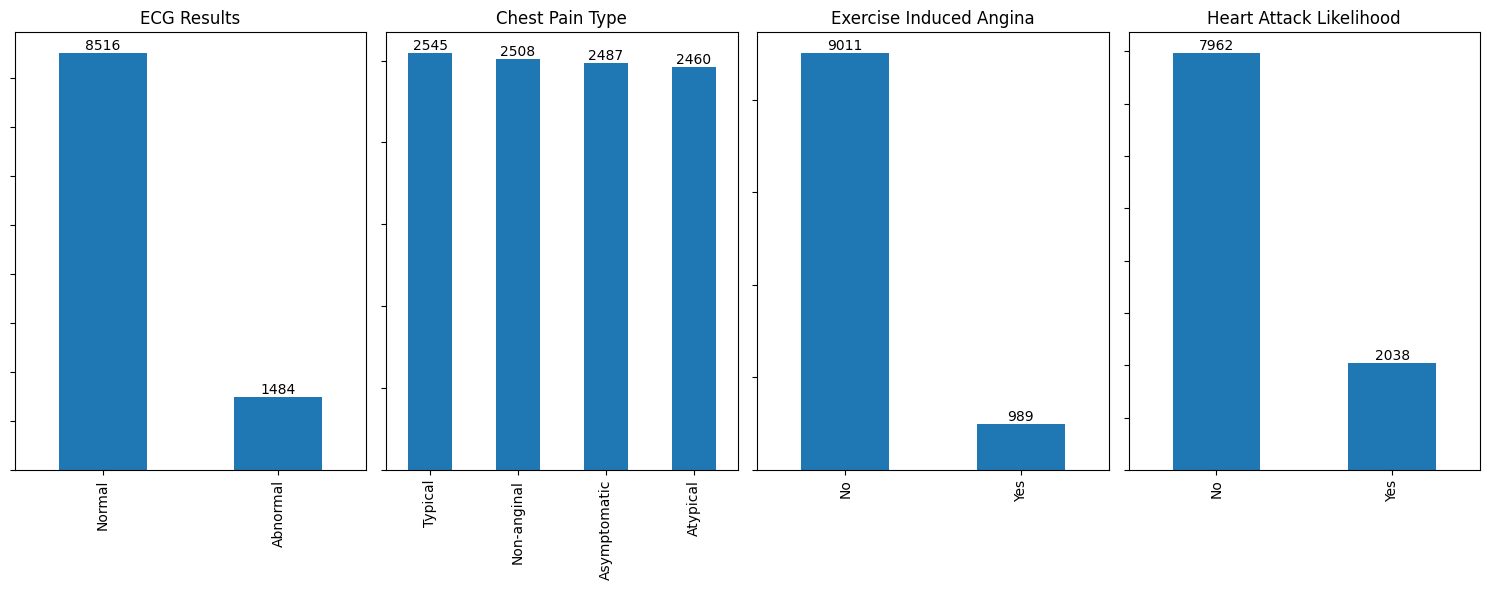

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, rotation=rotation, label_type=location)
    axes.set_ylabel("")
    axes.set_xlabel("")
    axes.set_yticklabels(())

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
lgr = LogisticRegression()
xgbc = XGBClassifier()
lgbc = LGBMClassifier(verbose=-100)

models_cl = [rfc, abc, gbc, etc,
         lgr, svc, xgbc, lgbc]

names_cl = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "Logistic Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

def training_classification():
    scores, reports, cms = [], dict(), dict()

    for i, j in zip(models_cl, names_cl):
        i.fit(x_train, y_train)
        pred = i.predict(x_test)
        scores += [accuracy_score(pred, y_test)*100]
        reports[j] = classification_report(pred, y_test)
        cms[j] = confusion_matrix(pred, y_test)
    fig, axes = plt.subplots()
    dd = pd.DataFrame({"score": scores}, index=names_cl)
    dd = dd.sort_values("score", ascending=False)
    dd["score"] = round(dd["score"], 2)
    dd["score"].plot(kind="bar", ax=axes)
    bar_labels(axes)
    plt.tight_layout()
    plt.show()
    
    index = 0

    for _ in range(2):
        fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
        for i in range(4):
            sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[i])
            axes[i].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()

    for i in dd.index:
        print("*"*30)
        print(i)
        print(reports[i])

        print("\n\n")

df = pd.read_csv("/kaggle/input/heart-attack-in-youth-of-india/heart_attack_youngsters_india.csv")

cats = [i for i in df.columns if df[i].nunique() <= 6]
def process_bp(x):

    x = x.split('/')

    return [float(x[0]), float(x[1])]

df["systolic"] = df["Blood Pressure (systolic/diastolic mmHg)"].apply(lambda x: process_bp(x)[0])
df["diastolic"] = df["Blood Pressure (systolic/diastolic mmHg)"].apply(lambda x: process_bp(x)[1])

df.drop("Blood Pressure (systolic/diastolic mmHg)", axis=1, inplace=True)
nums = [i for i in df.columns if i not in cats + ["systolic", "diastolic"]]

index = 0

for _ in range(4):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for i in range(4):
        df[cats[index]].value_counts().plot(kind="bar", ax=axes[i])
        bar_labels(axes[i])
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Count of clinical categorical features among patients with heart attack likelihood

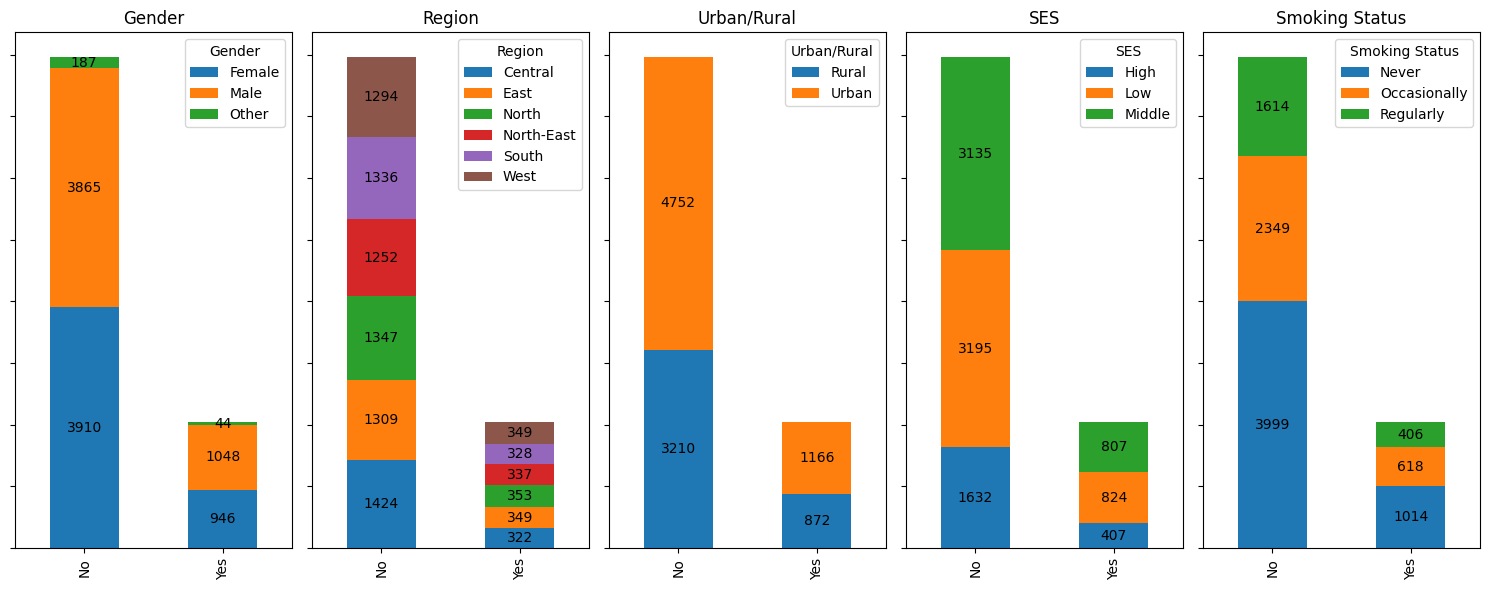

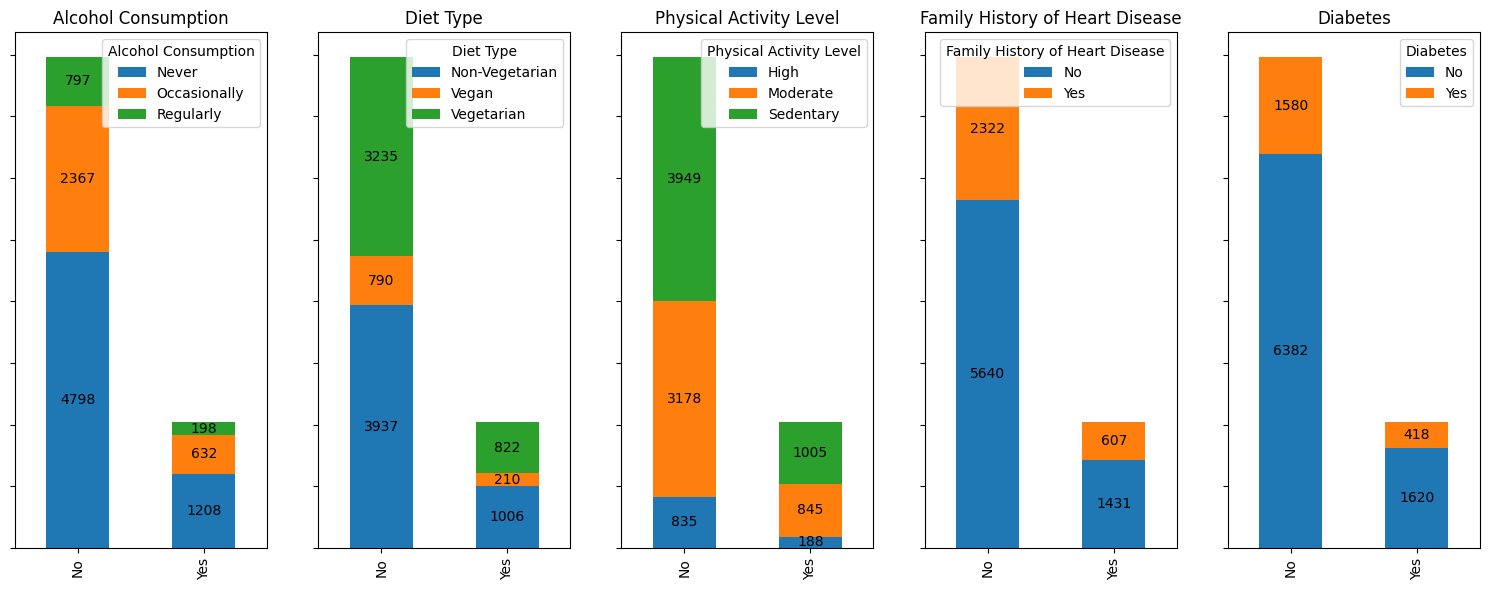

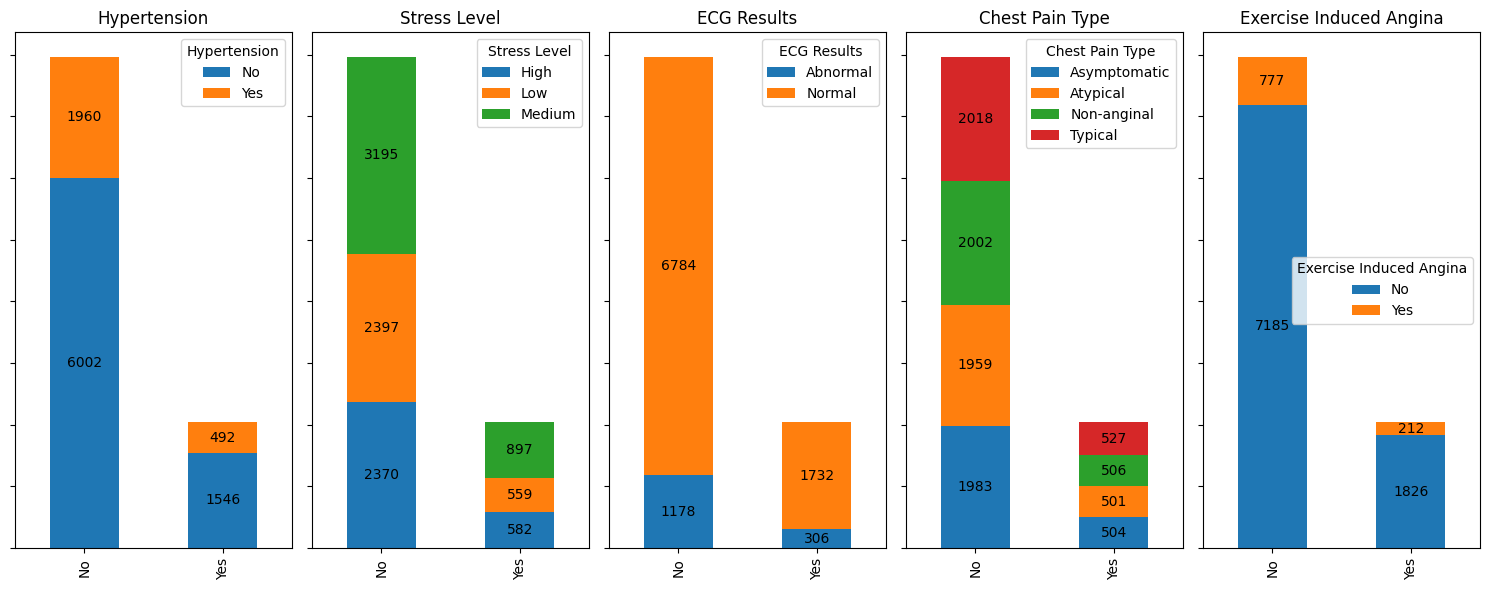

In [2]:
grouped = df.groupby(cats[-1])

index = 0

for _ in range(3):
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    for i in range(5):
        grouped[cats[index]].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
        bar_labels(axes[i], 0, "center")
        axes[i].set_title(cats[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Distribution of numerical clinical features

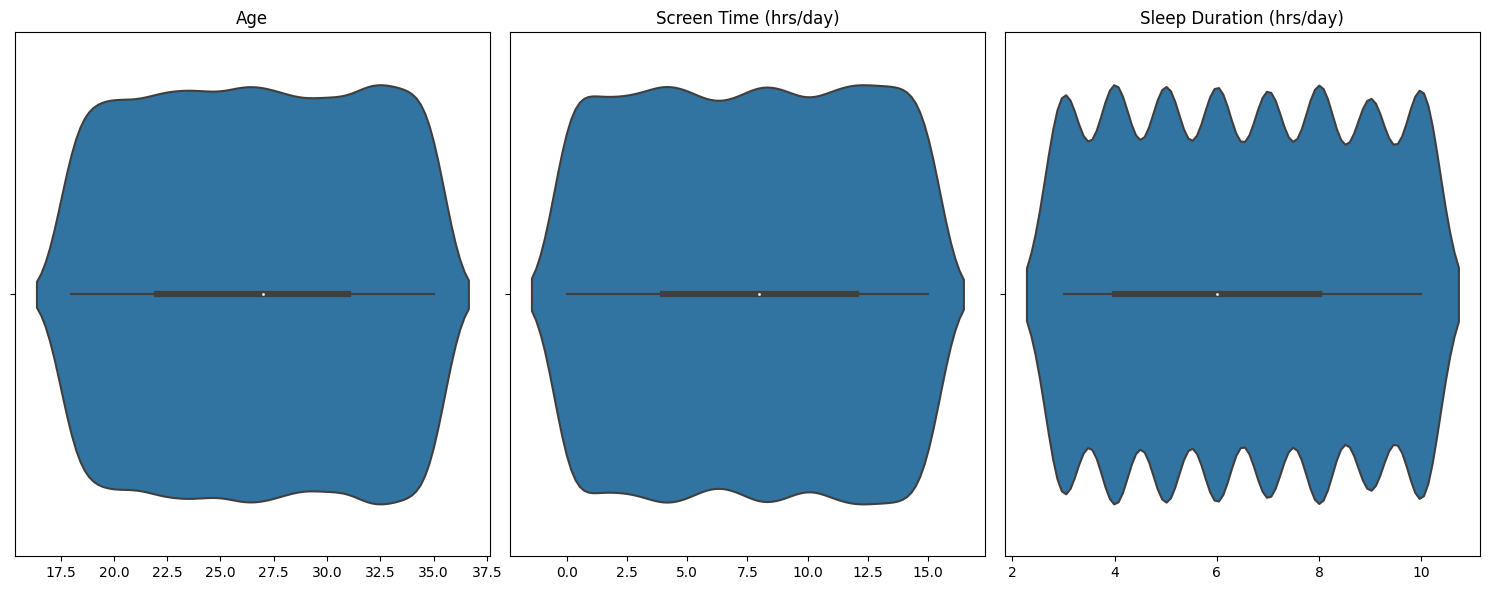

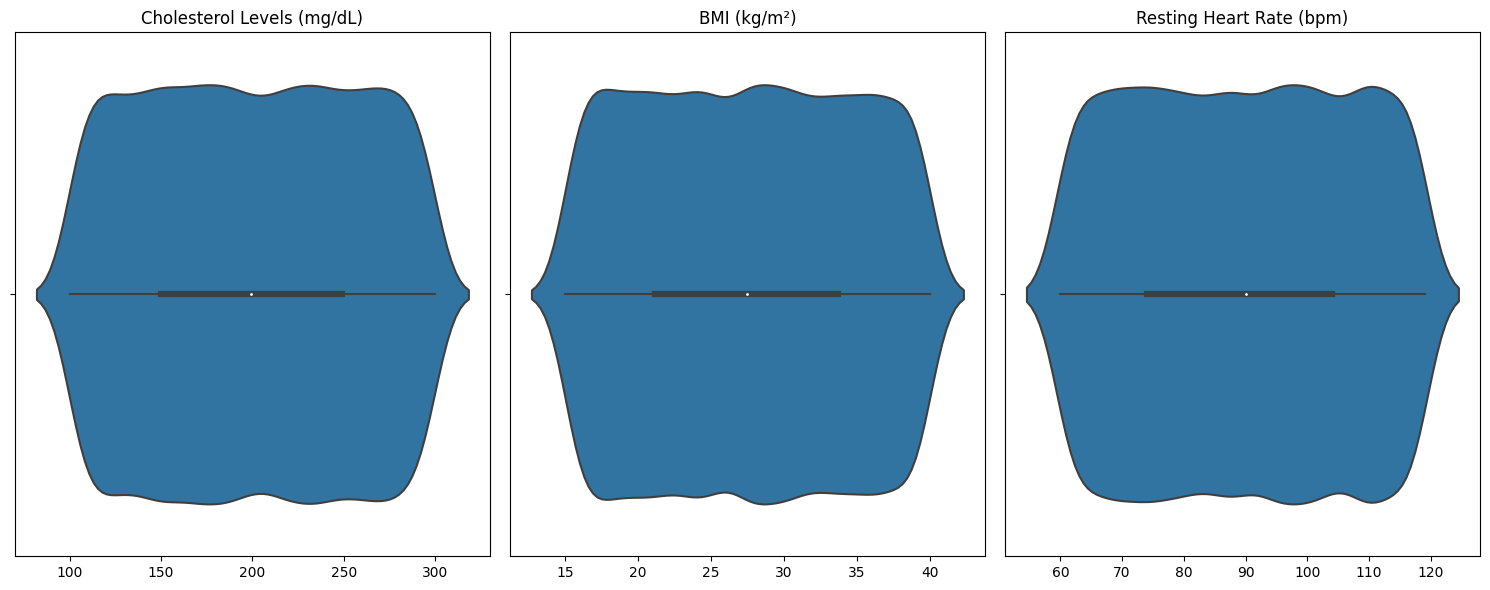

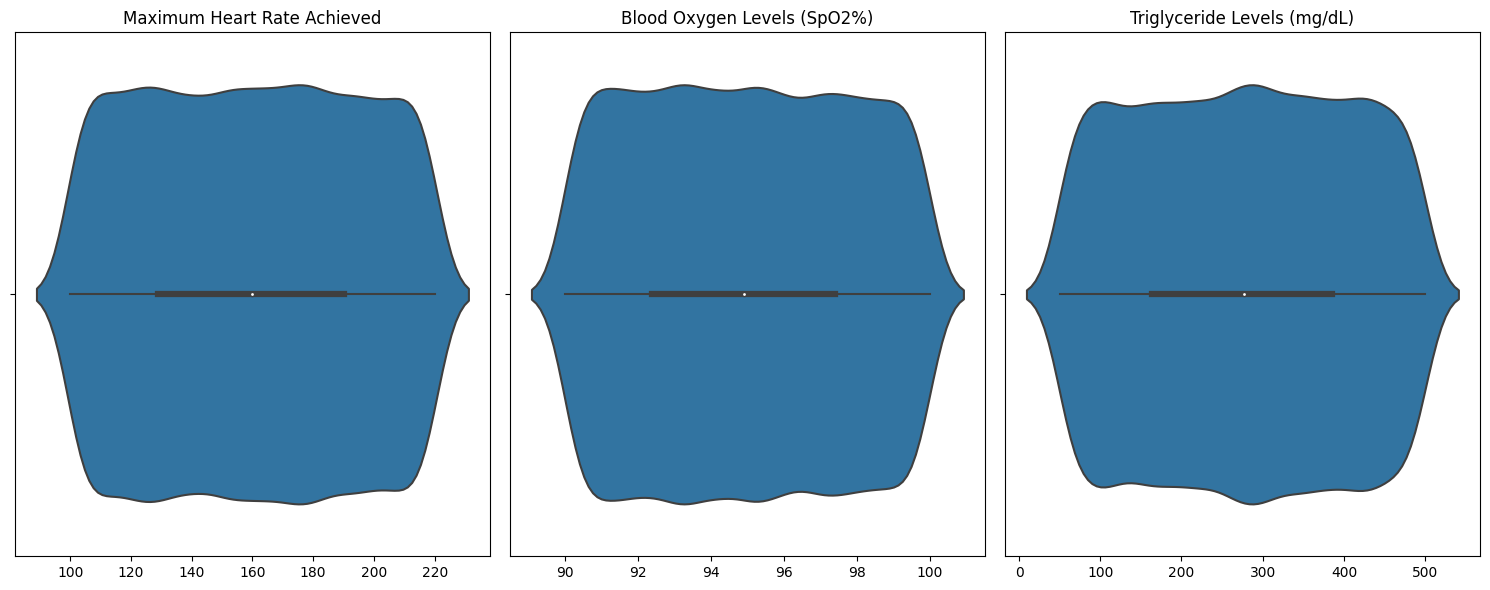

In [3]:
index = 0

for _ in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

    for i in range(3):
        sns.violinplot(df, x=nums[index], ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_title(nums[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Distribution among patients with different heart attack likelihoods

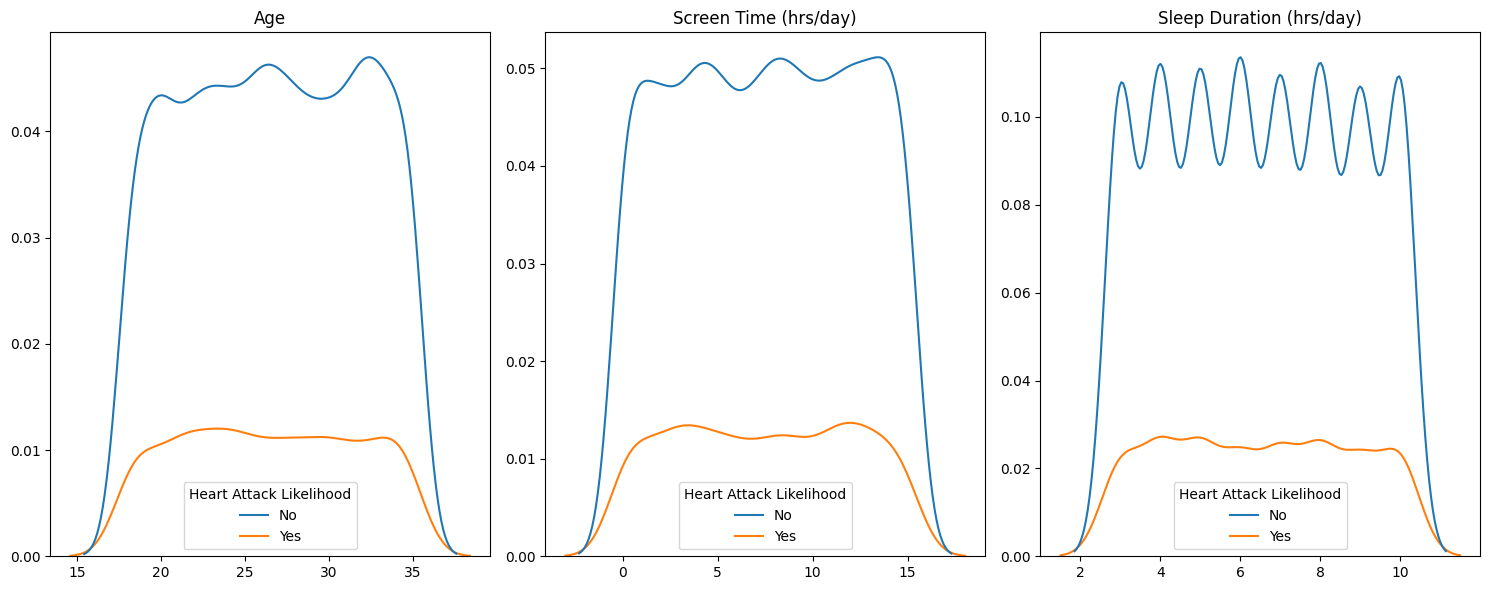

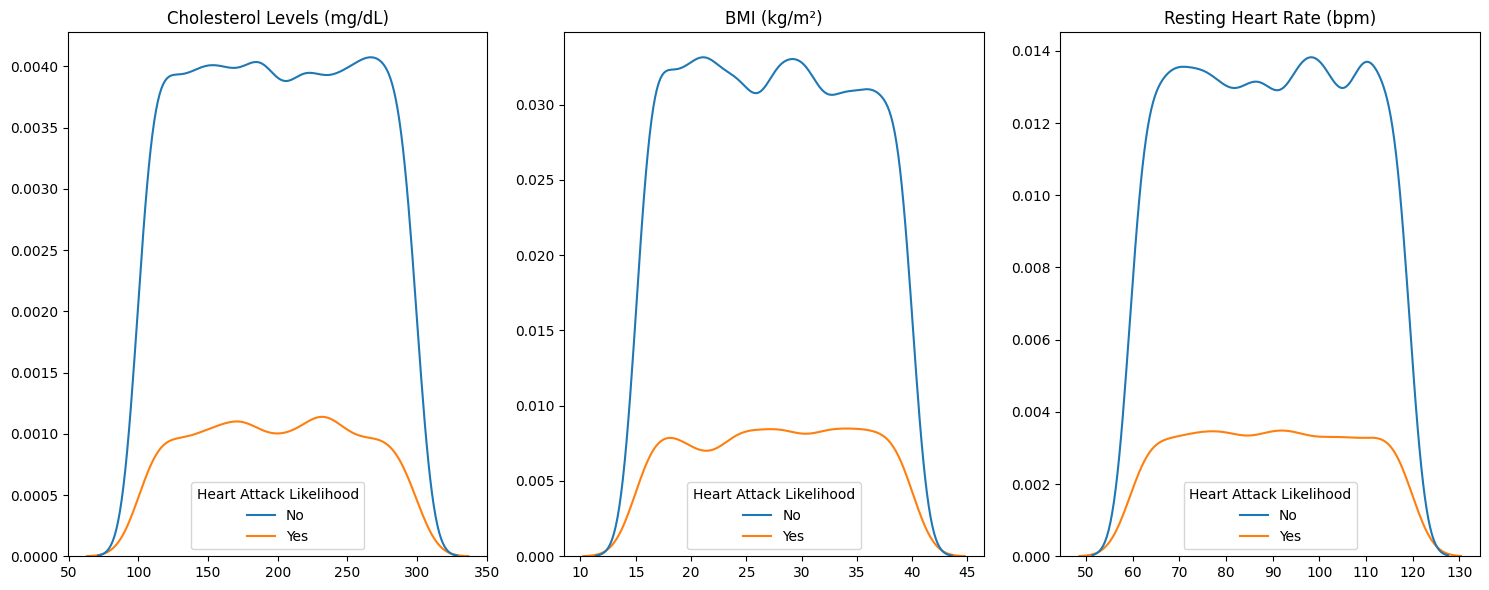

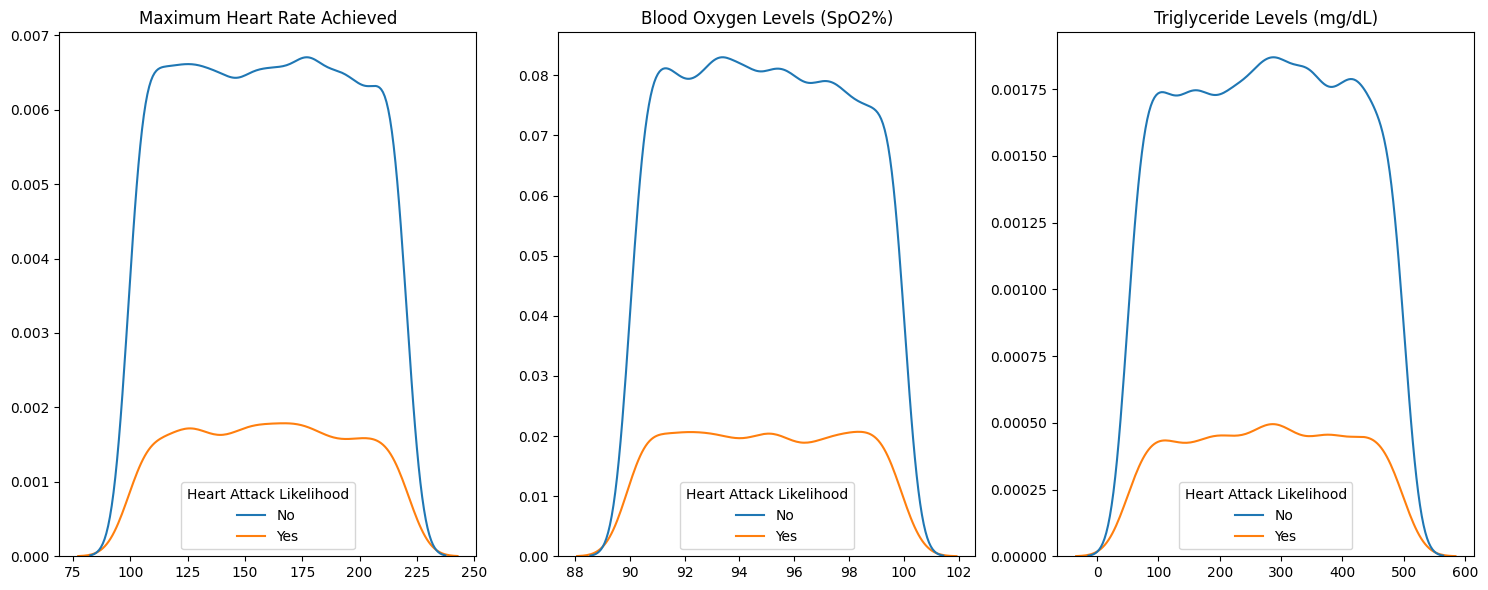

In [4]:
index = 0

for _ in range(3):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

    for i in range(3):
        sns.kdeplot(df, x=nums[index], hue=cats[-1], ax=axes[i])
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
        axes[i].set_title(nums[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

# Heart attack likelihood among patients with different blood pressure

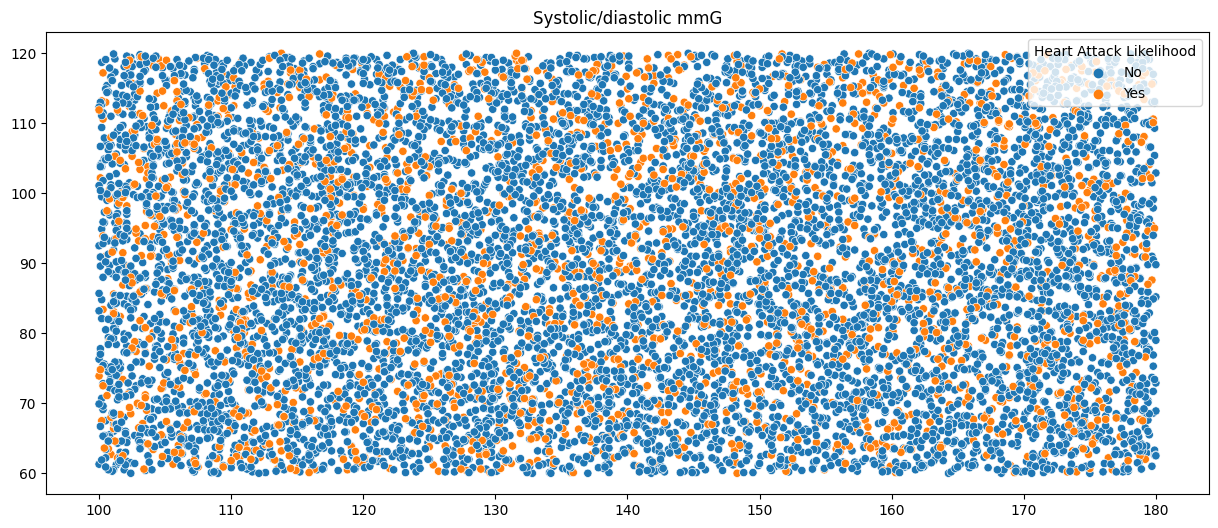

In [5]:
fig, axes = plt.subplots(figsize=(15, 6))

sns.scatterplot(df, x="systolic", y="diastolic", hue=cats[-1], ax=axes)
axes.set_ylabel("")
axes.set_xlabel("")
axes.set_title("Systolic/diastolic mmG")
plt.show()

# Heart attack likelihood prediction using ML classification algorithms - performance assessment

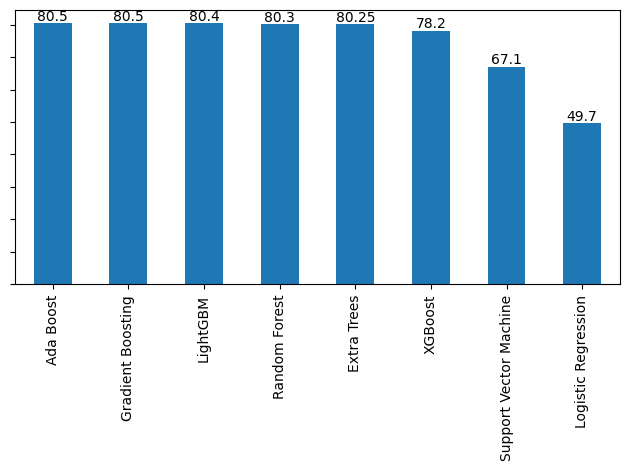

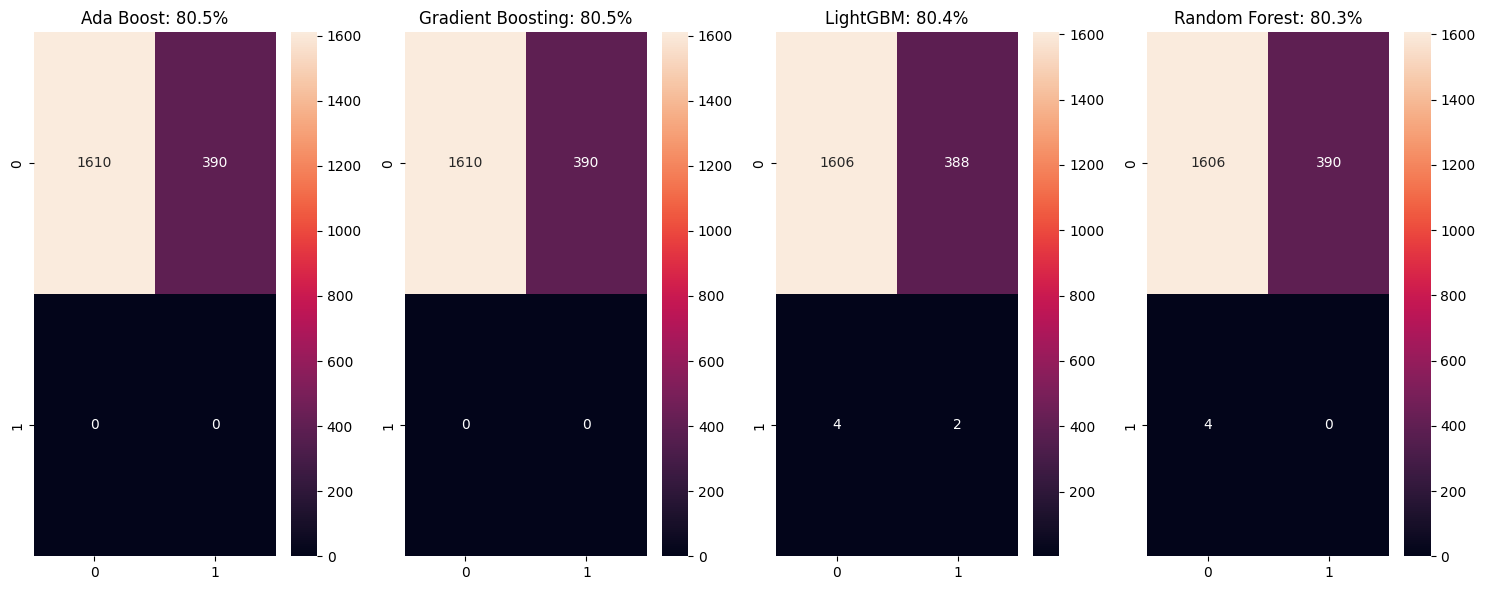

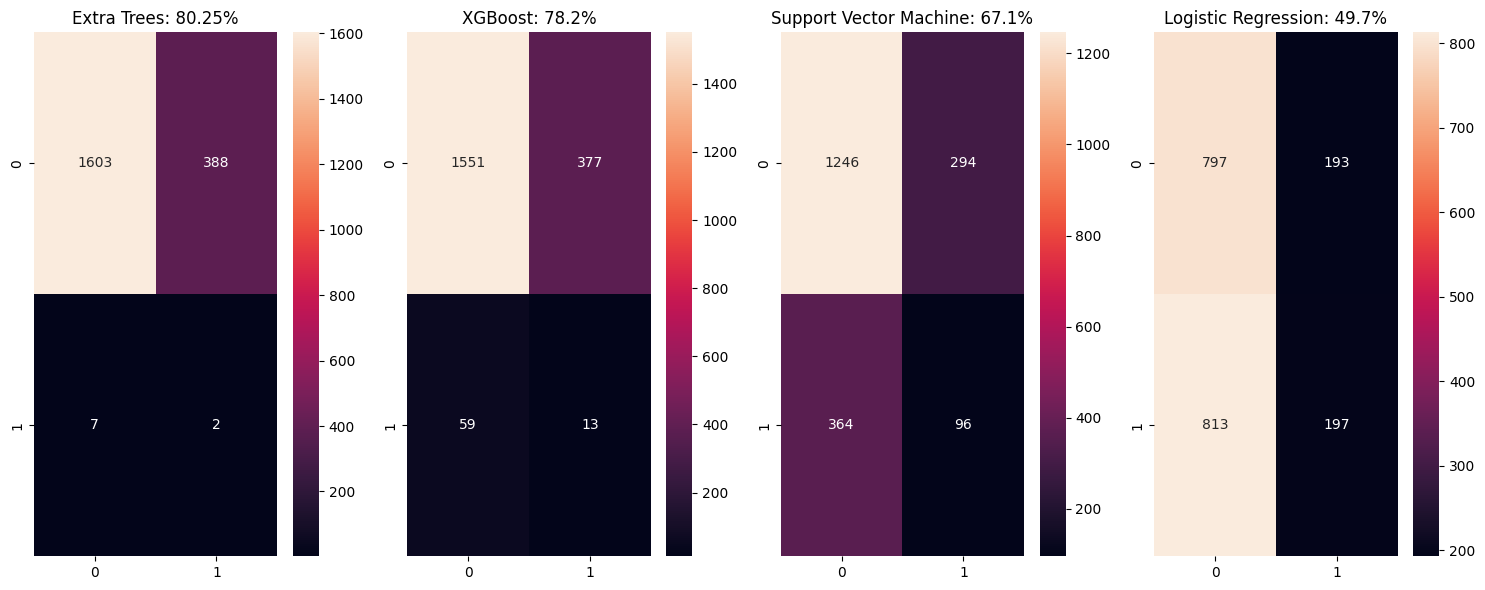

******************************
Ada Boost
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.81      2000
   macro avg       0.50      0.40      0.45      2000
weighted avg       1.00      0.81      0.89      2000




******************************
Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.81      2000
   macro avg       0.50      0.40      0.45      2000
weighted avg       1.00      0.81      0.89      2000




******************************
LightGBM
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1994
           1       0.01      0.33      0.01         6

    accuracy                           0.80   

In [6]:
for i in cats:
    df[i] = LabelEncoder().fit_transform(df[i].values)

scaler = MinMaxScaler()

x = df.drop(cats[-1], axis=1).values
y = df[cats[-1]].values

x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

x_train, y_train = SMOTE().fit_resample(x_train, y_train)

training_classification()